##  Dimensionalidad y Agrupación (II)

### Desafio 1:
- Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.
- Las imágenes se encuentran en una carpeta con el nombre album_covers
- Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .
- El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de
colores.
- Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
- Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
sklearn.cluster.KMeans : para extraer los principales componentes de una matriz
numérica.
skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

plt.style.use('seaborn')

In [2]:
#!pip install scikit-image

### Desafio 2:
Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos
io.imread . ¿Qué devuelve?
Para visualizar la imágen en el notebook, ocupe io.imshow .

In [3]:
nombre = "car-bomb-meta.jpg"

In [4]:
data = io.imread(nombre)

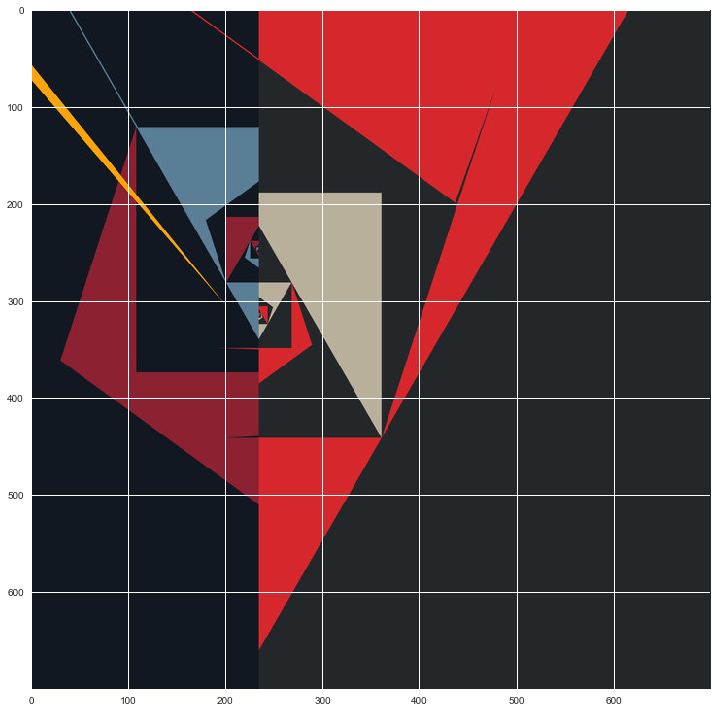

In [5]:
plt.figure(figsize=(20,10))
io.imshow(data)

### Desafio 3:

- Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad
de canales mediante shape .
- Posteriormente redimensionaremos la imágen con reshape .
- Partamos por inicializar nuestro algoritmo KMeans con un k=8,
    * ¿Qué significará esto?
    * Vuelva a implementar el mismo algoritmo con MiniBatchKMeans .¿Qué diferencia existe con KMeans?


In [6]:
# fila ,columna, canal que son los pix de la imagen
data.shape

(700, 700, 3)

In [7]:
#n*m Convertimos sin perder informacion en 3 columnas para generar RGB
data_reshape = data.reshape((data.shape[0]*data.shape[1],3))

In [8]:
model= KMeans(n_clusters=8)

In [9]:
model= model.fit(data_reshape)

In [10]:
model_mini =  MiniBatchKMeans(n_clusters=8)

In [11]:
model_mini= model_mini.fit(data_reshape)

El Mini Batch K-Means es una variante del algoritmo de K-Means que evalua los datos de a grupos y no toda la muestra completa, es por ello que el tiempo de procesamiento computacional es mucho menor.

### Desafio 4:
- Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
- Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
- Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True 

In [12]:
# Son una fila por cada pixel clasifica en cluster 
model.labels_

array([5, 5, 5, ..., 0, 0, 0])

In [13]:
# Conjunto de valores RGB
model.cluster_centers_

array([[ 35.02906223,  38.98726496,  42.00794123],
       [214.07887559,  39.01479265,  44.05345116],
       [183.64221557, 175.67702096, 154.87874252],
       [140.22527583,  33.52028084,  48.92164493],
       [ 90.32248925, 125.18239547, 148.34066041],
       [ 16.90796067,  23.98545586,  33.87572878],
       [245.054     , 163.102     ,  11.32533333],
       [ 79.78336653,  43.43824701,  46.69770916]])

In [14]:
np.unique(model.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([233846,  71860,  18704,  24924,  10236, 126926,   1500,   2004],
       dtype=int64))

In [15]:
#veo que color en el que mas se repite
count = pd.Series(model.labels_).value_counts()
prop = pd.Series(model.labels_).value_counts("%")
count

0    233846
5    126926
1     71860
3     24924
2     18704
4     10236
7      2004
6      1500
dtype: int64

### Desafio 5:
Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos por cada centroide

In [16]:
def hexadecimal(model):
    lista = []
    for i in model.cluster_centers_:
        R = int(round(i[0]))
        G = int(round(i[1]))
        B = int(round(i[2]))
        lista.append("#{:02x}{:02x}{:02x}".format(R, G, B))
    return lista   

In [17]:
hexa = hexadecimal(model)
hexa

['#23272a',
 '#d6272c',
 '#b8b09b',
 '#8c2231',
 '#5a7d94',
 '#111822',
 '#f5a30b',
 '#502b2f']

### Desafio 6:
Ahora generaremos un DataFrame con las siguientes variables:
    * El color hex .
    * La ocurrencia del color en cada pixel count .
    * El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .
Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia

In [18]:
df = pd.DataFrame(model.cluster_centers_, columns = ("R","G","B"))
df

,R,G,B
0,35.029062,38.987265,42.007941
1,214.078876,39.014793,44.053451
2,183.642216,175.677021,154.878743
3,140.225276,33.520281,48.921645
4,90.322489,125.182395,148.340660
5,16.907961,23.985456,33.875729
6,245.054000,163.102000,11.325333
7,79.783367,43.438247,46.697709


In [19]:
#proporcion de color por eso lo divido por 256
df = df[["R","G","B"]]/256

In [20]:
df["hexadecimal"] = hexa
df["ocurrencia"] = count
df["porcentaje_ocurrencia"] = prop
df = df.sort_values(by=["porcentaje_ocurrencia"], ascending=False)
df

,R,G,B,hexadecimal,ocurrencia,porcentaje_ocurrencia
0,0.136832,0.152294,0.164094,#23272a,233846,0.477237
5,0.066047,0.093693,0.132327,#111822,126926,0.259033
1,0.836246,0.152402,0.172084,#d6272c,71860,0.146653
3,0.547755,0.130939,0.191100,#8c2231,24924,0.050865
2,0.717352,0.686238,0.604995,#b8b09b,18704,0.038171
4,0.352822,0.488994,0.579456,#5a7d94,10236,0.020890
7,0.311654,0.169681,0.182413,#502b2f,2004,0.004090
6,0.957242,0.637117,0.044240,#f5a30b,1500,0.003061


In [21]:
colores = [(df.iloc[i]["R"], df.iloc[i]["G"], df.iloc[i]["B"]) for i in range(len(df))]
colores

[(0.1368322743518635, 0.15229400374935498, 0.1640935204122062),
 (0.06604672136480833, 0.09369318696603196, 0.1323270655570754),
 (0.8362456077783719, 0.15240153379834567, 0.1720837935742977),
 (0.5477549837011548, 0.1309385970411132, 0.1911001755265823),
 (0.7173524045659205, 0.6862383631173175, 0.6049950879492774),
 (0.35282222364695226, 0.48899373229293563, 0.5794557047430241),
 (0.31165377552290774, 0.16968065239043897, 0.1824129264193225),
 (0.9572421875000279, 0.637117187499995, 0.04423958333333669)]

### Desafio 7:
Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

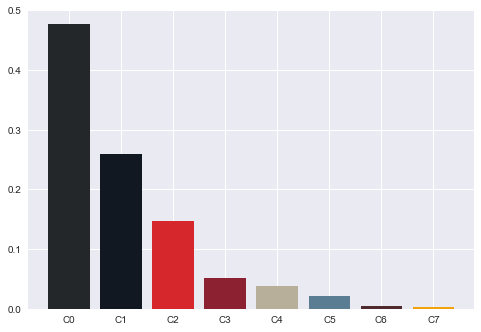

In [22]:
plt.bar(["C" + str(i) for i in range(8)], df["ocurrencia"] / len(data_reshape) , color = colores)
plt.show()

### Bonus point: Envuelva todo en una función

In [23]:
def colores_imagen(imagen, n_cluster):
    
    nombre = imagen
    data = io.imread(nombre)
    
    # Muestra la imagen cargada
    #print(io.imshow(data))
    
    # Redimensionamos la imagen para que sea una fila por cada pixer
    data_reshape = data.reshape((data.shape[0]*data.shape[1],3))
    
    
    # Modelamos
    model= KMeans(n_clusters = n_cluster).fit(data_reshape)
    
    df = pd.DataFrame(model.cluster_centers_, columns = ("R","G","B"))
    df = df[["R","G","B"]]/256

    df["ocurrencia"] = pd.Series(model.labels_).value_counts()
    df["porcentaje_ocurrencia"] = pd.Series(model.labels_).value_counts("%")
    df = df.sort_values(by=["porcentaje_ocurrencia"], ascending=False)
    display(df)
    
    colores = [(df.iloc[i]["R"], df.iloc[i]["G"], df.iloc[i]["B"]) for i in range(len(df))]
    
    print(plt.bar(["C" + str(i) for i in range(8)], df["ocurrencia"] / len(data_reshape) , color = colores))
    
    return 
    

,R,G,B,ocurrencia,porcentaje_ocurrencia
0,0.980368,0.975555,0.984681,693783,0.693783
2,0.098258,0.093400,0.098520,79138,0.079138
4,0.842025,0.851442,0.847502,67579,0.067579
5,0.043321,0.378829,0.640929,47374,0.047374
3,0.165727,0.259337,0.270340,46037,0.046037
1,0.370026,0.434671,0.367153,34472,0.034472
6,0.590202,0.663157,0.669824,19045,0.019045
7,0.672544,0.490642,0.290236,12572,0.012572


<BarContainer object of 8 artists>


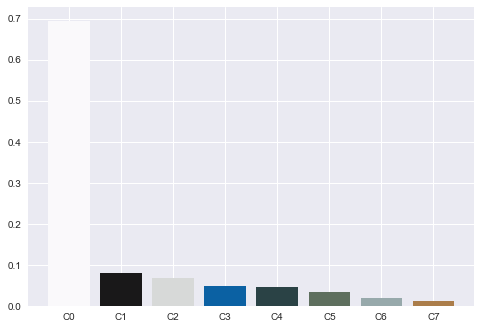

In [25]:
colores_imagen("brockhampton-saturation-ii.jpg",8)